In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
% matplotlib inline
rc('text', usetex=True)
rc('font', family='serif')

In [6]:
np.log10(6.56)-3

-2.1830961606243395

In [2]:
ab = str(raw_input("Model: "))
model = ab + "_millennium/"
path = "/home/esteban/Escritorio/Practica/Data/" + model
os.chdir( path )

Model: G13


In [ ]:
# =================== Correlation function ======================================
type_cut = int(raw_input("Type Cut:\n Stellar Mass: 1\n SFR: 2\n Choice:"))
os.chdir( path )
if type_cut == 1: cut = 'Stellar Mass/' ; tc = 'Mstell'
else: cut = 'SFR/'; tc = 'sfr'
    
path = "/home/esteban/Escritorio/Practica/Data/" + model
cat_path = path + '/xi_cat/' + cut
xi_sam_path = path + 'xi_sam/' + cut

# My Mocks Catalogues
bins, xi1, DD1, RR1 = np.loadtxt(cat_path + 'xi_cat_01.txt', unpack = True)
bins, xi2, DD2, RR2 = np.loadtxt(cat_path + 'xi_cat_02.txt', unpack = True)
bins, xi3, DD3, RR3 = np.loadtxt(cat_path + 'xi_cat_03.txt', unpack = True)
#bins, logxi4 = np.loadtxt(cat_path + 'xi_cat_04.txt', unpack = True)
logxi1 = np.log10(xi1)
logxi2 = np.log10(xi2)
logxi3 = np.log10(xi3)

rho1, rho2, rho3, rho4 = [3.5, 3.0, 2.5] 
# SAMs Catalogues
bins, xi1, DD1, RR1 = np.loadtxt(xi_sam_path + 'xi_3.5.txt',unpack=True)
bins, xi2, DD2, RR2 = np.loadtxt(xi_sam_path + 'xi_3.0.txt',unpack=True)
bins, xi3, DD3, RR3 = np.loadtxt(xi_sam_path + 'xi_2.5.txt',unpack=True)
logxi11 = np.log10(xi1)
logxi22 = np.log10(xi2)
logxi33 = np.log10(xi3)
#bins,logxi44 = np.loadtxt(path + 'xi_data_8.txt',unpack=True)
#rho1, rho2, rho3, rho4 = -3.5, -3, -2.5, -2

path = "/home/esteban/Escritorio/Practica/Plots/" + model
os.chdir( path )

#f, ax = plt.subplots(nrows = 2, figsize = [10,8])
f =plt.figure()

#plt.title(r"$n = 10^{%.1f} /h^{-3} Mpc^3$" %rho)
#ax[0].plot(bins,logxi1, 'g--', lw = .5, label = r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %rho1)
#ax[0].plot(bins,logxi2, 'r--', lw = .5, label = r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %rho2)
#ax[0].plot(bins,logxi3, 'b--', lw = .5, label = r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %rho3)
#ax[0].plot(bins,logxi4, 'k--', lw = .5, label = r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %rho4)
plt.plot(bins,logxi11, 'g-', lw = .8, label = r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %rho1)
plt.plot(bins,logxi22, 'r-', lw = .8, label = r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %rho2)
plt.plot(bins,logxi33, 'b-', lw = .8, label = r"$n = 10^{-%.1f} /h^{-3} Mpc^3$" %rho3)

#plt.plot(bins,logxi11, 'g-', lw = .8)

#ax[0].plot(bins,logxi11, 'g-', lw = .8)
#ax[0].plot(bins,logxi22, 'r-', lw = .8)
#ax[0].plot(bins,logxi33, 'b-', lw = .8)
#ax[0].plot(bins,logxi44, 'k-', lw = .8)

plt.ylim(-1,6)
plt.xlim(-2,1.5)
#ax[0].set_ylim(-1,2)
#ax[0].set_xlim(-0.5,1.3)

#div1 = logxi1 / logxi11
#div2 = logxi2 / logxi22
#div3 = logxi3 / logxi33
#div4 = logxi4 / logxi44

#ax[1].axhline(y=1, color='black', linestyle='--', lw=.4)
#ax[1].plot(bins, div1, 'g--', label = r"$n=10^{%.1f}/h^{-3}Mpc^3$" %rho1)
#ax[1].plot(bins, div2, 'r--', label = r"$n=10^{%.1f}/h^{-3}Mpc^3$" %rho2)
#ax[1].plot(bins, div3, 'b--', label = r"$n=10^{%.1f}/h^{-3}Mpc^3$" %rho3)
#ax[1].plot(bins, div4, 'k--', label = r"$n=10^{%.1f}/h^{-3}Mpc^3$" %rho4)
#ax[1].set_xlabel("$log(d/h^{-1}Mpc)$", fontsize = 14)
#ax[1].set_xlim(-0.5,1.3)
#ax[0].set_ylabel(r"$log(\xi)$", fontsize = 14)
#ax[0].legend(loc = 'best',title = r"\large{%s}" %cut[:-1], frameon = False, prop={'size':12})
plt.legend(loc = 'best',title = r"\large{%s}" %cut[:-1], frameon = False, prop={'size':12})
#yticks = ax[0].yaxis.get_major_ticks()
#yticks[0].label1.set_visible(False)
plt.annotate(r"\large{\textbf{%s}}" %ab, xy=(0.06,0.1), xycoords='axes fraction' )
plt.xlabel("$log(d/h^{-1}Mpc)$", fontsize = 14)
plt.ylabel(r"$log(\xi)$", fontsize = 14)
plt.minorticks_on()
#f.subplots_adjust(hspace=0)
#f.savefig('xi_cat_%s.pdf' %tc)
f.savefig('xi_%s.pdf' %tc)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)


In [ ]:
# ====================== HALO MASS FUNCTION =========================================
import glob as G
prop = ['r-', 'b-', 'k-']
ab = ['G13', 'GP14', 'L16']
f = plt.figure()
for i,ab in enumerate(ab):
    model = ab + "_millennium"
    path = "/home/esteban/Escritorio/Practica/Data/" + model
    os.chdir( path )
    bins, hmf = np.loadtxt(G.glob('hmf*')[0], unpack=True)
    if ab == 'GP14' or ab == 'L16':
        plt.plot(bins[3:], hmf[3:], prop[i], lw = .5, label = ab)
        continue
    plt.plot(bins, hmf, prop[i], lw = .5, label = ab)
    
plt.yscale('log')
plt.xlim(10,15)
plt.ylim(1e-7, 1e-1)
plt.ylabel(r"$n/h^3 Mpc^{-3}$", fontsize = 12 )
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 12) 
plt.legend(loc='upper right', frameon = False, prop={'size':10})
path = "/home/esteban/Escritorio/Practica/Plots"
os.chdir( path )
f.savefig("hmf.pdf") 

Type cut
 Stellarmass: 1
 SFR: 2
 Choice: 2


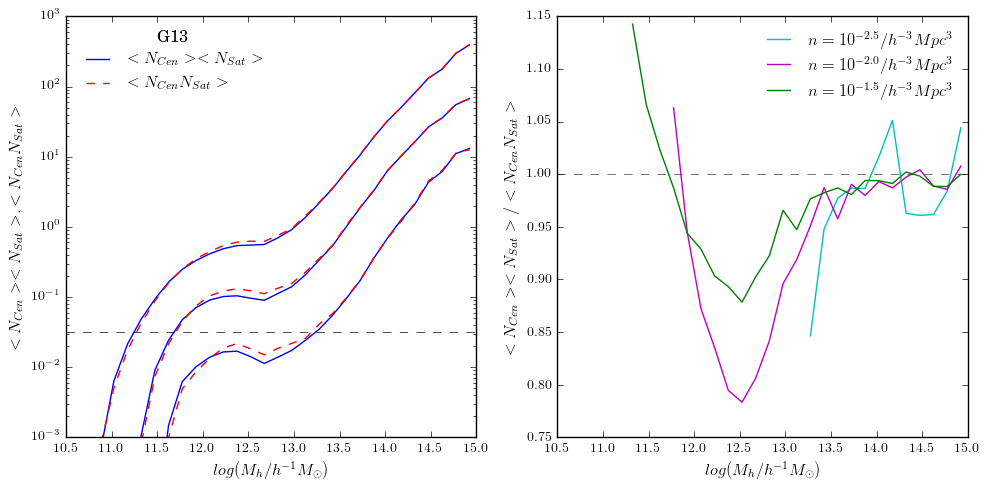

In [5]:
# ======================== TEST OF ASUMPTION ========================================
type_cut = int(raw_input("Type cut\n Stellarmass: 1\n SFR: 2\n Choice: "))
if type_cut == 1: type_cut = 'smass'
else: type_cut = 'sfr'
bins,ICS1, ACS1 = np.loadtxt('test_assumption_%s_2.5' %type_cut, unpack=True)
bins,ICS2, ACS2 = np.loadtxt('test_assumption_%s_2.0' %type_cut, unpack=True)
bins,ICS3, ACS3 = np.loadtxt('test_assumption_%s_1.5' %type_cut, unpack=True)
rho1, rho2, rho3 = -2.5, -2.0, -1.5

f, ax = plt.subplots(ncols = 2, figsize =[10,5])

ax[0].plot(bins, ICS1, 'b-', label = r"$<N_{Cen}><N_{Sat}>$")
ax[0].plot(bins, ACS1, 'r--', label = r"$<N_{Cen}N_{Sat}>$")
ax[0].plot(bins, ICS2, 'b-',)
ax[0].plot(bins, ACS2, 'r--',)
ax[0].plot(bins, ICS3, 'b-',)
ax[0].plot(bins, ACS3, 'r--',)
ax[0].axhline(y= 10**(-1.5), color = 'black', linestyle = '--', lw = .5)
ax[0].set_xlim(10.5,15)
ax[0].set_yscale('log')
ax[0].set_ylim(1e-3, 1e3)
ax[0].set_xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 12)
ax[0].set_ylabel(r"$<N_{Cen}><N_{Sat}>, <N_{Cen}N_{Sat}>$", fontsize = 12)
ax[0].legend(loc = 'upper left',title = r"\large{G13}", frameon = False, prop={'size':12})

mask1 = ICS1 > 10**(-1.5)
mask2 = ICS2 > 10**(-1.5)
mask3 = ICS3 > 10**(-1.5)
bins1 = bins[mask1]
bins2 = bins[mask2]
bins3 = bins[mask3]

ACS1, ACS2, ACS3 = ACS1 + 1e-10, ACS2 + 1e-10, ACS3 + 1e-10
div1 = ICS1[mask1]/ACS1[mask1]
div2 = ICS2[mask2]/ACS2[mask2]
div3 = ICS3[mask3]/ACS3[mask3]
div = np.array([div1, div2, div3])

#tp = ['c-', 'c-', 'c-']
rho = [rho1, rho2, rho3]
ax[1].axhline(y=1, color='black', linestyle='--', lw=.4)
ax[1].plot(bins1, div1, 'c-', label = r"$n=10^{%.1f}/h^{-3}Mpc^3$" %rho1)
ax[1].plot(bins2, div2, 'm-', label = r"$n=10^{%.1f}/h^{-3}Mpc^3$" %rho2)
ax[1].plot(bins3, div3, 'g-', label = r"$n=10^{%.1f}/h^{-3}Mpc^3$" %rho3)


#ax[1].set_yscale('log')
#ax[1].set_ylim(1e-2,1e2)
ax[1].set_xlim(10.5,15)
ax[1].set_xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 12)
ax[1].set_ylabel(r"$<N_{Cen}><N_{Sat}>/<N_{Cen}N_{Sat}>$", fontsize = 12)
ax[1].legend(loc='best', frameon=False)
#ax[1].annotate(r"\large{\textbf{%s}}" %ab, xy=(0.06,0.1), xycoords='axes fraction' )
    
    
f.tight_layout()
f.savefig("Test_Assumption_%s.pdf" %type_cut)


In [ ]:
# ================================ CSMF or CSMASS ==========================================
import glob as G
prop = ['r-', 'b-', 'k-']
ab = ['G13', 'GP14', 'L16']
f = plt.figure()
for i,ab in enumerate(ab):
    model = ab + "_millennium"
    path = "/home/esteban/Escritorio/Practica/Data/" + model
    os.chdir( path )
    bins, CF = np.loadtxt(G.glob('CSFR*.txt')[0], unpack=True)
    plt.plot(bins, CF, prop[i], lw = .5, label = ab)
    
plt.xlim(-3.5, 2)
plt.ylim(-5.5,0)
#plt.xlim(6.5, 11.5)
#plt.ylim(-4,0)

plt.xlabel(r"$\log(SFR/M_{\odot}Yr^{-1}$)", fontsize = 12)
plt.ylabel(r"$\log(Ngal (> x)/h^3 Mpc^{-3})$ ", fontsize = 12)
#plt.xlabel(r"$\log(M_{*} / h^{-1}M_{\odot})$", fontsize = 12)
#plt.ylabel(r"$\log(Ngal (> x) /h^{3} Mpc^{-3})$ ", fontsize = 12)

plt.legend(loc='upper right', frameon = False, prop={'size':10})
path = "/home/esteban/Escritorio/Practica/Plots"
os.chdir( path )
f.savefig("CSFR.pdf")